# **The N-Body Problem**

- Two bodies orbit around eachother's center of mass (Ex: Moon and Earth) using Kepler's laws
- When multiple bodies are involved, it becomes harder to predict the individual motions of these bodies that are interacting with eachother gravitationally - it becomes chaotic(unpredictable) ...with just 3 objects...imagine more than 3
- *The restrictive 3-body problem* is solvable. For example the two stars of about same mass orbiting each other and the planet they are on is much smaller than those stars. 
- **Perturbation Theory**: a two-body system that is regularly tugged by a small third body, the tugging of orbit cancels out when you add it up all together. (Laplace)
### Below, we will build a simulation to observe how the positions and velocities of a 3 body system evolves over time


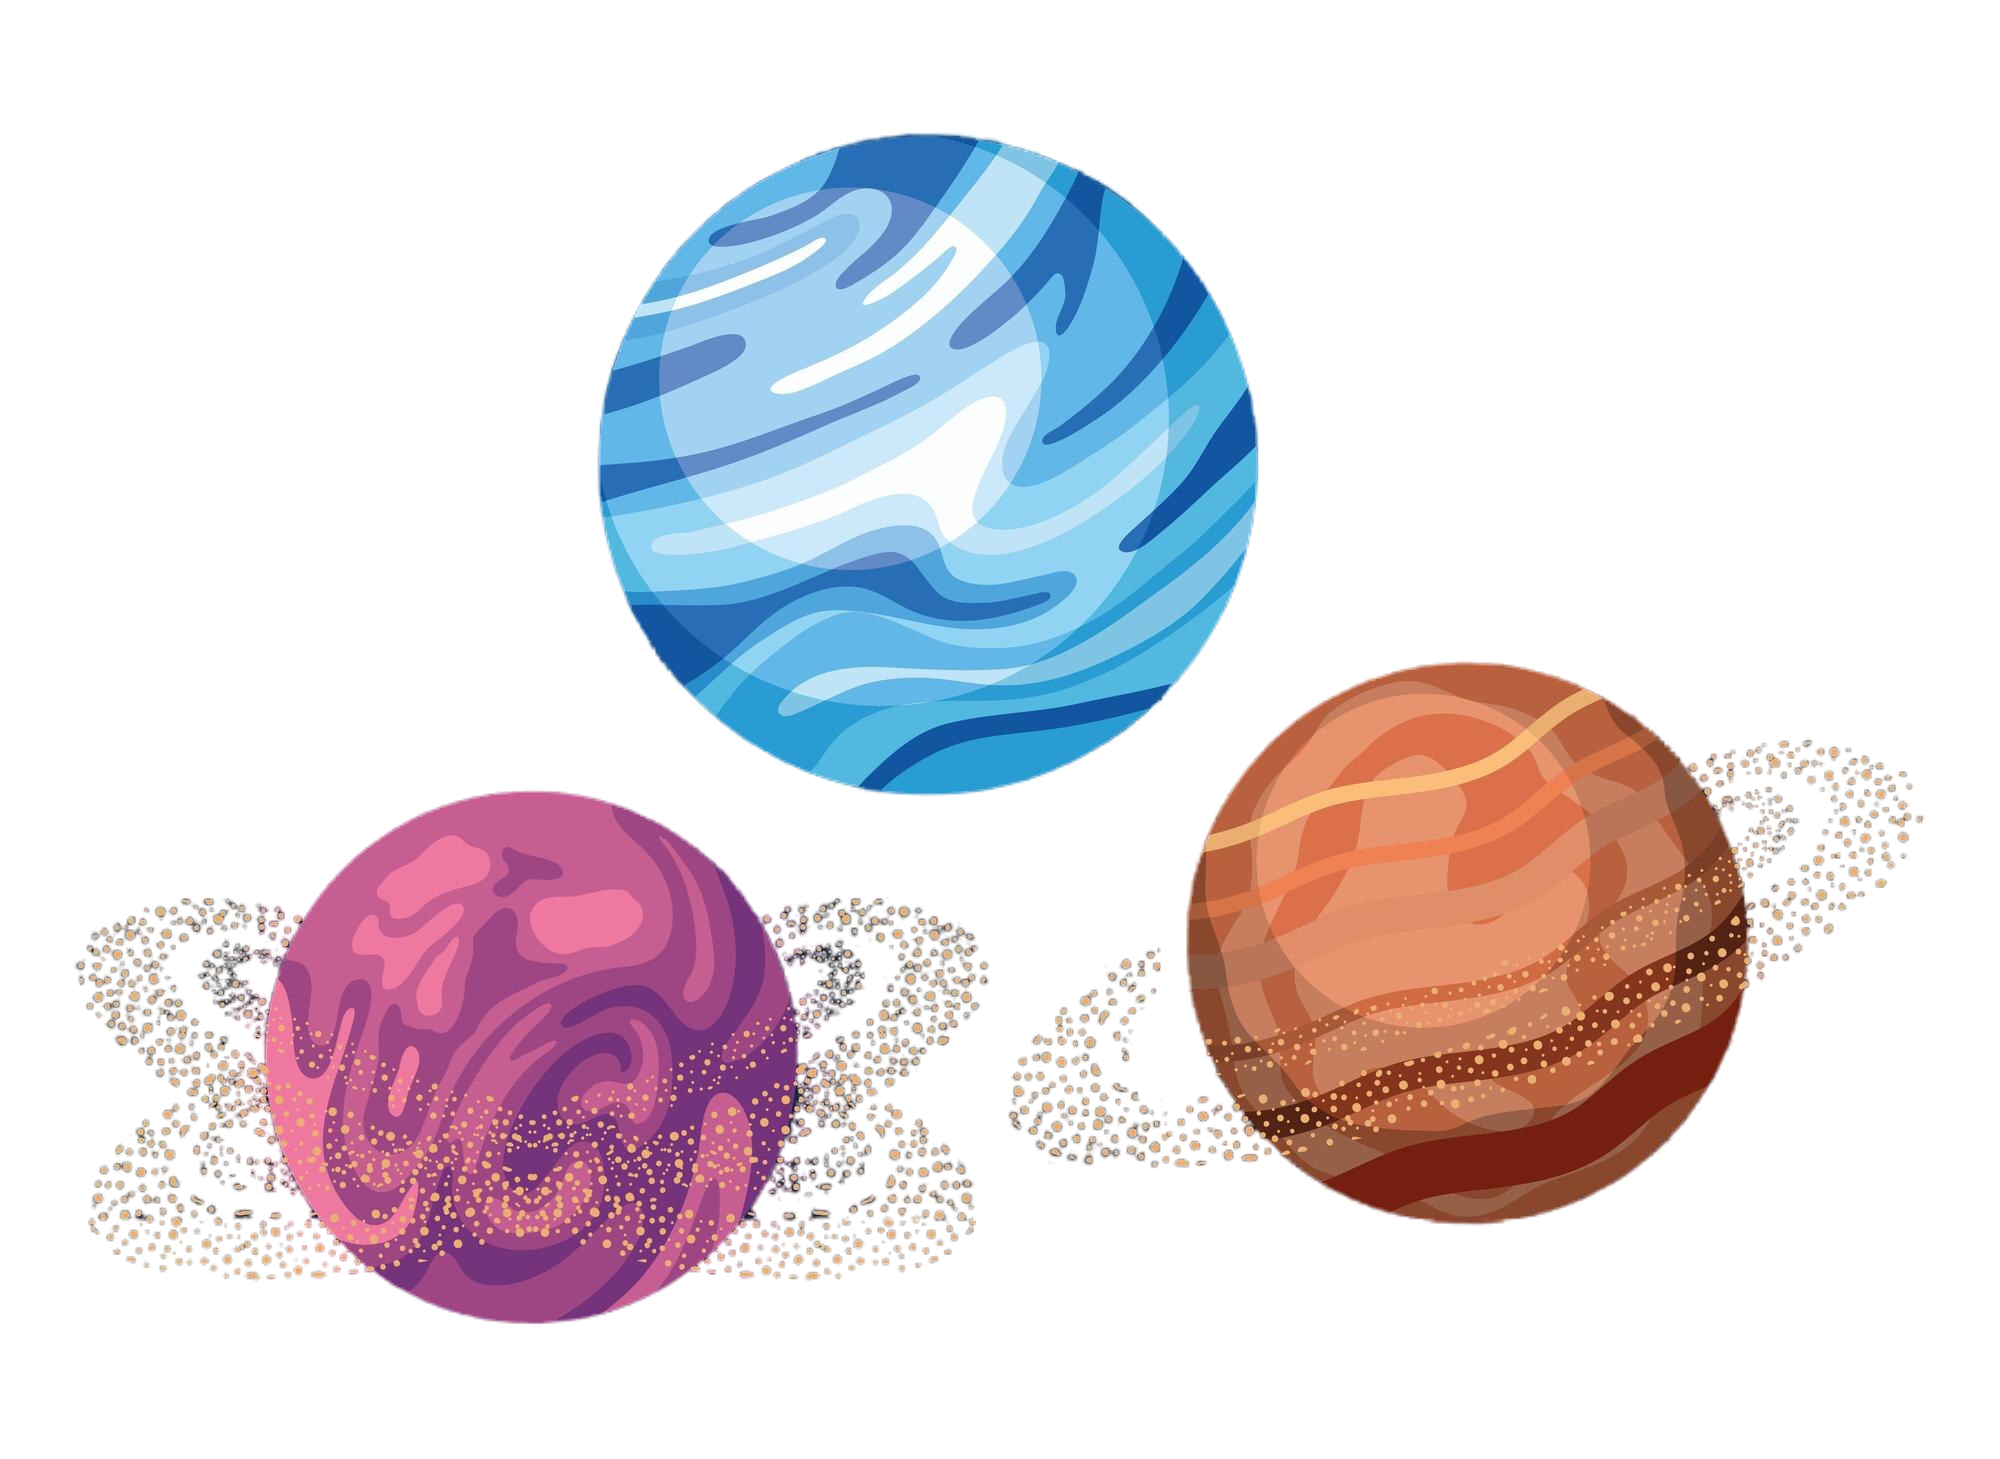

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 1 = Sun
#### 2 = Earth
#### 3 =Moon

In [15]:
G = 6.67430e-11  # m^3 kg^-1 s^-2

# masses in kg 
m1 = 1.989e30 
m2 = 5.972e24 
m3 = 7.348e22  

- Below we define an equation to calculate the derivatives of the positions and velocities at any given time 't'
- 'w' is the input vector. It's a single array that contains the position and velocities of the Sun, Earth and Moon. 
- It contains 18 elements, first 9 are the positions of the 3 bodies and the last 9 are velocites

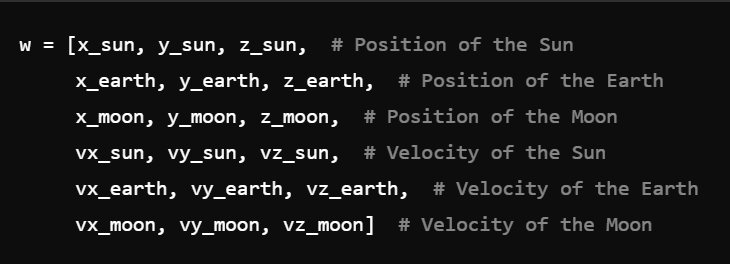

In [16]:
def equations(w, t, G, m_sun, m_earth, m_moon):
    
    # 3D position vectors of the Sun, Earth and Moon, respectively
    r1 = w[0:3] #extracts the first 3 elements of 'w' which are [x_sun, y_sun, z_sun]
    r2 = w[3:6]
    r3 = w[6:9]
    
    # 3D velocity vectors extracted from 'w'
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]

    #below are vectors that represent relative positions between each pair of bodies
    r12 = r2 - r1 #vector from Sun to Earth
    r13 = r3 - r1 # vector from Sun to Moon
    r23 = r3 - r2 # vector from Earth to Moon

    # Pairwise distances: scalar distances between each pain of bodies, calculated using Euclidean norm 'np.linalg.norm'
    # which computes the length of the separation vectors^
    d12 = np.linalg.norm(r12)
    d13 = np.linalg.norm(r13)
    d23 = np.linalg.norm(r23)
    
 # Accelerations - See Below
    a1 = G * m2 * r12 / d12**3 + G * m3 * r13 / d13**3
    a2 = G * m1 * (-r12) / d12**3 + G * m3 * r23 / d23**3
    a3 = G * m1 * (-r13) / d13**3 + G * m2 * (-r23) / d23**3

# Concatenate the derivatives into a single array
    derivs = np.concatenate((v1, v2, v3, a1, a2, a3))
    return derivs

#### Accelerations (Newton's Law of Universal Gravitation): 

- a1 is the acceleration of the first body m1 due to the gravitational forces from m2 and m3
- Each body's acceleration is influenced by the gravitational forces from the other two bodies. 

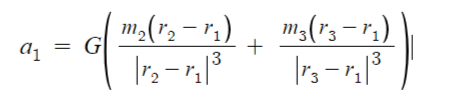

In [20]:
# Initial positions
r1_0 = np.array([0, 0, 0])
r2_0 = np.array([1.496e11, 0, 0])
r3_0 = np.array([1.496e11 + 3.844e8, 0, 0])

#Initial Velocities
v1_0 = np.array([0, 0, 0]) 
v2_0 = np.array([0, 29783, 0])  
v3_0 = np.array([0, 29783 + 1022, 0])  

# Combining the initial conditions of all three bodies into a single array
initial_conditions = np.concatenate((r1_0, r2_0, r3_0, v1_0, v2_0, v3_0))

In [21]:
# Time grid (in seconds)
# linspace(start, end, interval)
    
t = np.linspace(0, 3.154e7, 1000)  # 1 year = 3.154e7 seconds

# Solve differential equations
#odeint function integrates the equations of motion over time
solution = odeint(equations, initial_conditions, t, args=(G, m1, m2, m3))


# Extract the positions from the solution
# These arrays store the 3D positions of the Sun, Earth and Moon. 
# The slicing extracts the relevant parts of the 'solution' array
r1_sol = solution[:, 0:3]
r2_sol = solution[:, 3:6]
r3_sol = solution[:, 6:9]

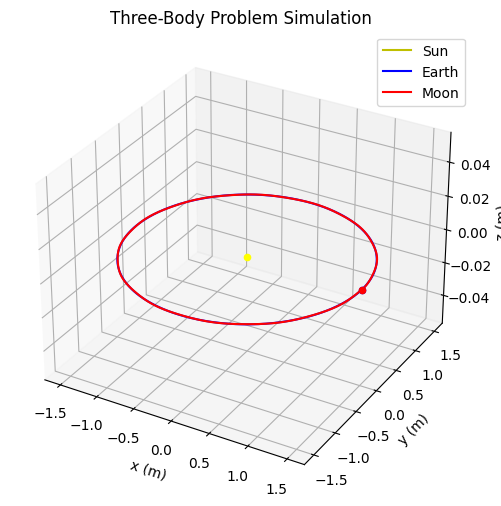

In [22]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], 'y', label='Sun')
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], 'b', label='Earth')
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], 'r', label='Moon')
ax.scatter(r1_0[0], r1_0[1], r1_0[2], color='yellow')
# Sun initial position
ax.scatter(r2_0[0], r2_0[1], r2_0[2], color='blue')  # Earth initial position
ax.scatter(r3_0[0], r3_0[1], r3_0[2], color='red')  # Moon initial position
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.legend()
ax.grid(True)
ax.set_title('Three-Body Problem Simulation')
plt.show()

#### Altering the initial positions, velocities, masses and experimenting with the time will show how these factors influence the motion of celestial bodies 

#### Introduce small perturbations to inital conditions to explore the chaotic nature of the three-body problem. The slightest change leads to drastically different outcome. 

#### Introduce different 3-body systems